Tensorflow 설치

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 54 kB/s 
     |████████████████████████████████| 2.9 MB 58.8 MB/s 
     |████████████████████████████████| 459 kB 75.2 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
 

2차 방정식의 계수 추정

In [ ]:
a = tf.constant(2.0) #constant : 상수(변하지 않음)
y = tf.constant(8.0)
x = tf.Variable(10.0) #variable도 하나의 tensor

print(a) #tensor : 흘러가는 데이터
print(x) #variable 객체 : 데이터를 다룰 때 numpy array 형태로 다룸

tf.Tensor(2.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>


In [ ]:
#loss함수 정의
loss = tf.math.abs(a * x - y) #x가 weight, a는 상수
loss

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [ ]:
def train_func():
  #미분 사용하기
  with tf.GradientTape() as tape:
    #loss 함수에서 loss 구하기
    loss = tf.math.abs(a * x - y)
    #loss 찍어보면 0; but 그안에 식에 대한 정보 가지고 있음(그래프로 연결되어 있으므로)
    #type(loss) => EagerTensor
    print("loss : {}, type : {}".format(loss, type(loss)))
  
  #loss함수에 대해 x로 미분하기
  dx = tape.gradient(loss, x)
  #x와 기울기 출력
  print("x = {}, dx = {}".format(x.numpy(), dx))

  #가중치 업데이트 - assign : x를 (x-dx)로 갱신해라
  x.assign(x - dx)

for i in range(4):
  train_func()

x = 10.0, dx = 2.0
x = 8.0, dx = 2.0
x = 6.0, dx = 2.0
x = 4.0, dx = 0.0


2차 방정식의 계수 추정 - 2차함수 연속값이므로 cost함수로 MSE 활용
- 딥러닝 2-1. 신경망 학습 p.12 참고
- t : 정답, y : 예측한 값
- tensorflow : numpy와 작동방식 비슷, element-wised & broadcasting 지원

Optimizer - Gradient Descent

In [ ]:
%%time
# 임의로 x 범위 설정(-5부터 5까지 0.1간격으로 데이터 만들기)
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
lr = 0.001

# update해야 할 값들
w1 = tf.Variable(1.0) #변해야 하는 값이니까 variable
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

histloss = []
for epoch in range(10000):
  with tf.GradientTape() as tape:
    # RMSE - Root MSE => loss 함수
    # loss는 수식이고 이걸 그래프로 만들려면 gradienttape안에 넣어줘야 함
    loss = tf.sqrt(tf.reduce_mean(tf.square(w1 * x * x + w2 * x + b - y))) #예측값; tf.square = 제곱

  # 변화시킬 값들의 미분값 구하기
  dw1, dw2, db = tape.gradient(loss, [w1, w2, b])

  # 변화시킬 값들 update : 예측값 - 학습률 * 미분값
  w1.assign_sub(lr * dw1) #w1.assign(w1 - lr * dw1) 이 식과 동일
  w2.assign_sub(lr * dw2)
  b.assign_sub(lr * db)

  #loss 줄어드는 것 보기위해 histloss에 append
  histloss.append(loss)
  if epoch % 50 == 0: #50번마다 찍겠다
    print(f"epoch = {epoch}, loss = {loss}")
    # loss가 15에서 0.06까지 감소

epoch = 0, loss = 15.339600563049316
epoch = 50, loss = 10.53668212890625
epoch = 100, loss = 7.254340648651123
epoch = 150, loss = 5.8860344886779785
epoch = 200, loss = 5.382297992706299
epoch = 250, loss = 5.042600631713867
epoch = 300, loss = 4.732669353485107
epoch = 350, loss = 4.437992095947266
epoch = 400, loss = 4.158863067626953
epoch = 450, loss = 3.8971211910247803
epoch = 500, loss = 3.654714584350586
epoch = 550, loss = 3.433422565460205
epoch = 600, loss = 3.2346432209014893
epoch = 650, loss = 3.059171676635742
epoch = 700, loss = 2.9070029258728027
epoch = 750, loss = 2.7772514820098877
epoch = 800, loss = 2.668198585510254
epoch = 850, loss = 2.577488660812378
epoch = 900, loss = 2.502406597137451
epoch = 950, loss = 2.440169334411621
epoch = 1000, loss = 2.3881609439849854
epoch = 1050, loss = 2.344085454940796
epoch = 1100, loss = 2.306025266647339
epoch = 1150, loss = 2.272446870803833
epoch = 1200, loss = 2.242157459259033
epoch = 1250, loss = 2.214254856109619
ep

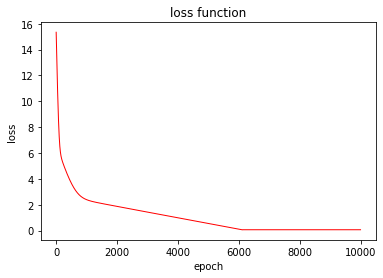

In [ ]:
# loss 함수 시각화
plt.plot(histloss, color='red', linewidth=1)
plt.title("loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
# loss 떨어지는걸 보니 학습 잘 되는구나!
# epoch 6000쯤부터 변화x

Optimizer - Momentum

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
%%time
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
lr = 0.001

# update해야 할 값들
w1 = tf.Variable(1.0) #변해야 하는 값이니까 variable
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]

# Momentum 적용 - SGD를 보완한 것
opt = optimizers.SGD(learning_rate=lr, momentum=0.7)

histloss = []
for epoch in range(10000):
  with tf.GradientTape() as tape:
    # RMSE - Root MSE => loss 함수
    # loss는 수식이고 이걸 그래프로 만들려면 gradienttape안에 넣어줘야 함
    loss = tf.sqrt(tf.reduce_mean(tf.square(w1 * x * x + w2 * x + b - y))) #예측값; tf.square = 제곱

  # 변화시킬 값들의 미분값 구하기
  grads = tape.gradient(loss, var_list)
  # 가중치 업데이트 - 구한 grads를 어떻게 업데이트할지 결정하는게 optimizer
  opt.apply_gradients(zip(grads, var_list))

  #loss 줄어드는 것 보기위해 histloss에 append
  histloss.append(loss)
  if epoch % 500 == 0: #50번마다 찍겠다
    print(f"epoch = {epoch}, loss = {loss}")
    print(f"w1 = {w1.numpy()}, w2 = {w2.numpy()}")

epoch = 0, loss = 15.339600563049316
w1 = 1.010164737701416, w2 = 1.0009921789169312
epoch = 500, loss = 2.023297071456909
w1 = 2.202728509902954, w2 = 2.9980216026306152
epoch = 1000, loss = 1.2853883504867554
w1 = 2.128865957260132, w2 = 3.008208751678467
epoch = 1500, loss = 0.5479283928871155
w1 = 2.054847478866577, w2 = 3.0034937858581543
epoch = 2000, loss = 0.0375760979950428
w1 = 1.996767520904541, w2 = 3.0000345706939697
epoch = 2500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 3000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 3500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 4000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 4500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 5000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 5500, loss = 0.037

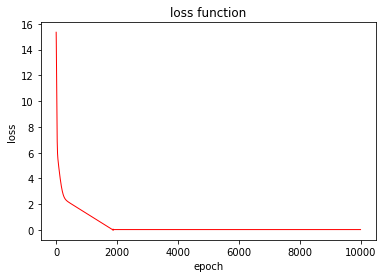

In [ ]:
plt.plot(histloss, color='red', linewidth=1)
plt.title("loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
#위와 달리 epoch 2000번 안쪽에서 수렴 - 수렴속도 더 빠름(2000이후 학습 필요 x)
#계산량은 더 많지만 튀는 정도 덜하기 때문에 빠르게 수렴

Optimizer - Adam

In [ ]:
%%time
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
lr = 0.001

# update해야 할 값들
w1 = tf.Variable(1.0) #변해야 하는 값이니까 variable
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]

# Adam
opt = optimizers.Adam(learning_rate=lr)

def loss():
  return tf.sqrt(tf.reduce_mean(tf.square(w1 * x * x + w2 * x + b - y)))

histLoss = []
for epoch in range(10000):
  # minimize : gradient 구하고 가중치 업데이트
  opt.minimize(loss, var_list = var_list)

  #loss 줄어드는 것 보기위해 histloss에 append
  histLoss.append(loss())
  if epoch % 500 == 0: #500번마다 찍겠다
    print(f"epoch = {epoch}, loss = {histLoss[-1]}")

epoch = 0, loss = 15.327645301818848
epoch = 500, loss = 9.454402923583984
epoch = 1000, loss = 4.246377468109131
epoch = 1500, loss = 1.9247740507125854
epoch = 2000, loss = 1.4152452945709229
epoch = 2500, loss = 1.0947701930999756
epoch = 3000, loss = 0.7711126208305359
epoch = 3500, loss = 0.44227075576782227
epoch = 4000, loss = 0.11060690134763718
epoch = 4500, loss = 0.000905002816580236
epoch = 5000, loss = 0.0009234699537046254
epoch = 5500, loss = 0.0008568525081500411
epoch = 6000, loss = 0.0008003414841368794
epoch = 6500, loss = 0.0007409106474369764
epoch = 7000, loss = 0.0007376551511697471
epoch = 7500, loss = 0.0007144282571971416
epoch = 8000, loss = 0.0007153843180276453
epoch = 8500, loss = 0.0007511757430620492
epoch = 9000, loss = 0.0007269848720170557
epoch = 9500, loss = 0.0007421072223223746
CPU times: user 28.6 s, sys: 95.6 ms, total: 28.7 s
Wall time: 29.5 s


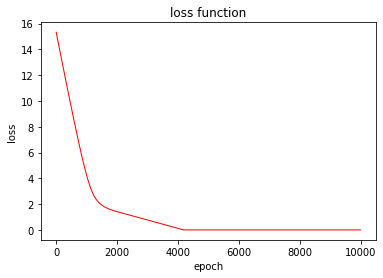

In [ ]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
#Adam이 항상 제일 좋은 건 아님..
#초기값 어떻게 주는지에 따라 성능 달라짐

Keras : Sequential model
- 위처럼 직접 계산하지 않도록 도와주는 툴

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 입출력 정해지면 w 차원 정해짐. dense layer 개수만큼 w 생김.
# bias 자동설정
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x * x, x]).T #stack : 쌓는 것

In [ ]:
np.array([x*x, x]).shape
#array에서 두개 만들었고, x가 100개이므로 shape = (2,100)

(2, 100)

In [ ]:
np.stack([x*x, x]).T.shape
# (100,2) = (샘플의 개수, 입력의 개수)

(100, 2)

In [ ]:
#model 구성
model = Sequential()
#layer를 계속 붙이는 방식
model.add(Dense(1, input_dim=2)) #Xavier glorot 초기값 사용
model.compile(loss='mse', optimizer=optimizers.RMSprop(lr=0.05))
#학습 & 학습기록 histloss처럼 기록
h = model.fit(dataX, y,batch_size=10, epochs=300) #랜덤하게 10개씩 뽑아서 300번 돌리기

Epoch 1/300
10/10 [==============================] - 0s 2ms/step - loss: 224.5917
Epoch 2/300
10/10 [==============================] - 0s 1ms/step - loss: 95.0915
Epoch 3/300
10/10 [==============================] - 0s 1ms/step - loss: 45.3892
Epoch 4/300
10/10 [==============================] - 0s 1ms/step - loss: 25.6676
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 15.7695
Epoch 6/300
10/10 [==============================] - 0s 1ms/step - loss: 9.2668
Epoch 7/300
10/10 [==============================] - 0s 1ms/step - loss: 5.2406
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 3.1194
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 1.8393
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 1.1762
Epoch 11/300
10/10 [==============================] - 0s 2ms/step - loss: 0.7452
Epoch 12/300
10/10 [==============================] - 0s 2ms/step - loss: 0.4015
Epoch 13/300
10/10 [===========

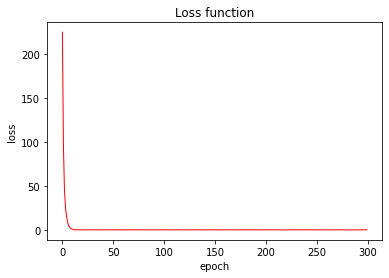

In [ ]:
plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
#모델 구조 파악
model.summary()
#input 2개 & output 1개 => param 3개!
#param 3개 : w0, w1, b

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
params = model.layers[0].get_weights()
print("w1 : {:.2f}".format(params[0][0][0]))
print("w2 : {:.2f}".format(params[0][1][0]))
print("b : {:.2f}".format(params[1][0]))
# 원래 위에서 w1:2, w2:3, b:5 이렇게 썼는데 model 돌린 추정값도 이와 비슷하게 나옴!

w1 : 1.96
w2 : 2.97
b : 4.97


Keras - Functional API

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x * x, x]).T

xInput = Input(batch_shape=(None, dataX.shape[1]))
yOutput = Dense(1)(xInput)
model = Model(xInput, yOutput)
model.compile(loss="mse", optimizer=optimizers.Adam(learning_rate=0.05))

h = model.fit(dataX, y, batch_size=10, epochs=300)

Epoch 1/300
10/10 [==============================] - 0s 2ms/step - loss: 233.5495
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 106.4796
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 35.5300
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 18.7476
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 12.6378
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 8.7239
Epoch 7/300
10/10 [==============================] - 0s 1ms/step - loss: 6.1930
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 4.5962
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 4.1000
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 3.6729
Epoch 11/300
10/10 [==============================] - 0s 2ms/step - loss: 3.3964
Epoch 12/300
10/10 [==============================] - 0s 2ms/step - loss: 3.0637
Epoch 13/300
10/10 [==========

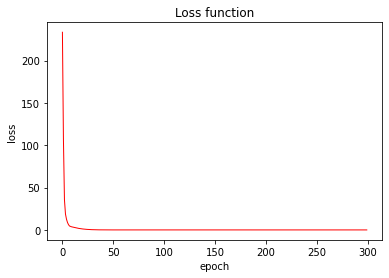

In [ ]:
plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
model.summary()
#inputlayer - param이 없음
#dense layer - param 3개

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
params = model.layers[1].get_weights()
print("w1 : {:.2f}".format(params[0][0][0]))
print("w2 : {:.2f}".format(params[0][1][0]))
print("b : {:.2f}".format(params[1][0]))

w1 : 2.00
w2 : 3.00
b : 5.00


tensorflow v1과 비교

In [ ]:
import tensorflow.compat.v1 as tf
tf.__version__

'2.3.0'

In [ ]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


iris tensorflow v1로 해보기

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris_X = iris.data
# iris target을 one-hot encoding
iris_y = pd.get_dummies(iris.target).to_numpy()

In [ ]:
iris_y[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

In [ ]:
train_X.shape
#sample의 개수: 105개
#feature 개수: 4개

(105, 4)

<신경망 layer 복습>
- 샘플의 개수: 입출력을 105번 돌리는 것
- 입력노드의 개수: 4개 - 여기에 bias는 포함x
- 출력노드의 개수: 3개 - why? 우리가 맞혀야 하는 건 꽃 종류의 수! so, output 개수는 3개!
- w는 1차원: w.shape = (입력의 크기, 출력의 크기) = (4,3)
- b도 1차원: b.shape = (1, 출력의 크기) = (1,3) = (3,)

불편한 예전 버전 V1

In [ ]:
#v1에서 사용하는 방법!
#x, y의 변수 선언 - 샘플 개수는 아직 모르니까 None
x = tf.placeholder(tf.float32, [None, 4]) #변수의 수가 4개; 값은 비어있음
y = tf.placeholder(tf.float32, [None, 3]) #클래스가 3개

In [ ]:
W = tf.Variable(tf.zeros([4,3])) #weight shape : (입력의 개수, 출력의 개수)
b = tf.Variable(tf.zeros([3])) #bias shapep : (출력의 개수)

In [ ]:
#출력
h = tf.nn.softmax(tf.matmul(x, W) + b) #matmul로 output 구해서 softmax 함수 취함

In [ ]:
#손실함수 정의
cross_entropy = -tf.reduce_sum(y * tf.log(h), reduction_indices=[1]) #답지 * 예측값
loss = tf.reduce_mean(cross_entropy)

In [ ]:
#학습 정의 - loss함수, optimizer
#v1에서는 먼저 정의만 하고 연결은 나중에
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [ ]:
#v1에서는 이렇게 세션 따로 만들어 사용했었음
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
for i in range(100000):
  #placeholder에 값 넣어주는 것
  _, loss_values = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
  if i % 10000 == 0:
    print(i, loss_values)

0 0.28379795
10000 0.23611484
20000 0.20631167
30000 0.18581773
40000 0.17079735
50000 0.15927438
60000 0.15012614
70000 0.14267017
80000 0.13646227
90000 0.13120523


In [ ]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [ ]:
#데이터는 session에 있음 - 값 보려면 이렇게 해줘야 함
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

1.0


원래 버전 V2 - Sequential

In [ ]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
n_features = train_X.shape[1]
#3층 layer - 원하는대로 layer 추가해서 만들 수 있음
#input_shape : 1차원 -> 입력 개수 나타냄
model = Sequential()
#10개, 8개는 hidden layer
#relu니까 he_normal로 가중치 초기화
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#위의 10개의 output이 아래의 input => so, 따로 input 넣지 않아도 됨
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))

#맨 마지막 층의 output 개수는 3개로 정해져 있음
model.add(Dense(3, activation='softmax')) #마지막 layer

In [ ]:
#가중치 학습 방법, loss함수(목적함수), 평가지표 정의
#sparse_categorical_crossentropy : label로 받음, 층 여러개 있을 때 교차 엔트로피
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_X, np.argmax(train_y, axis=1), epochs=300, batch_size=32) #verbose=0; 로그 안 찍히도록

Train on 105 samples
Epoch 1/300
105/105 [==============================] - 0s 90us/sample - loss: 2.2821 - acc: 0.3524
Epoch 2/300
105/105 [==============================] - 0s 92us/sample - loss: 2.1139 - acc: 0.3524
Epoch 3/300
105/105 [==============================] - 0s 62us/sample - loss: 1.9720 - acc: 0.3619
Epoch 4/300
105/105 [==============================] - 0s 95us/sample - loss: 1.8618 - acc: 0.3810
Epoch 5/300
105/105 [==============================] - 0s 67us/sample - loss: 1.7717 - acc: 0.4667
Epoch 6/300
105/105 [==============================] - 0s 72us/sample - loss: 1.6949 - acc: 0.5810
Epoch 7/300
105/105 [==============================] - 0s 76us/sample - loss: 1.6367 - acc: 0.6571
Epoch 8/300
105/105 [==============================] - 0s 93us/sample - loss: 1.5784 - acc: 0.6190
Epoch 9/300
105/105 [==============================] - 0s 68us/sample - loss: 1.5225 - acc: 0.6000
Epoch 10/300
105/105 [==============================] - 0s 70us/sample - loss: 1.4649 - 

In [ ]:
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy : {acc}')

test accuracy : 0.9555555582046509


In [ ]:
#parameter tuning
#decay : update마다 적용되는 학습률의 감소율 - decay=0으로 두면 작아지지 않음; 학습률 변화시키려고 두는 것
#학습 진행하면서 학습률 점차 조정
model.compile(optimizer=optimizers.Adam(learning_rate=0.002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, np.argmax(train_y, axis=1), epochs=300, batch_size=32, verbose=0) #verbose=0; 로그 안 찍히도록 하는 옵션
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy : {acc}')

test accuracy : 1.0


v2 - Functional API

In [ ]:
input_layer = Input(shape=(n_features, )) #입력층 만들기
hidden_layer_1 = Dense(10)(input_layer)
hidden_layer_2 = Dense(8)(hidden_layer_1)
output_layer = Dense(3, activation='softmax')(hidden_layer_2)
model = Model(input_layer, output_layer)

model.compile(optimizer=optimizers.Adam(learning_rate=0.002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, np.argmax(train_y, axis=1), epochs=300, batch_size=32, verbose=0)
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy : {acc}')

test accuracy : 0.9777777791023254
